# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Valentinus Wastu Rosari
- **Email:** m008b4ky4394@bangkit.academy
- **ID Dicoding:** valentinus_rosari

## Menentukan Pertanyaan Bisnis

- Jam berapa sepeda paling banyak disewa per harinya?
- Bagaimana cuaca mempengaruhi permintaan persewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [49]:
# Membaca dataset hour.csv
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
print("Duplikasi: ", hour_df.duplicated().sum())

Duplikasi:  0


In [53]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*karena data sudah baik, tidak diperlukan proses Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [54]:
# Mengelompokkan data berdasarkan jam untuk mengitung total sepeda yang disewa pada setiap jam tiap hari
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()
hourly_rentals

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


## Visualization & Explanatory Analysis

### Pertanyaan 1:

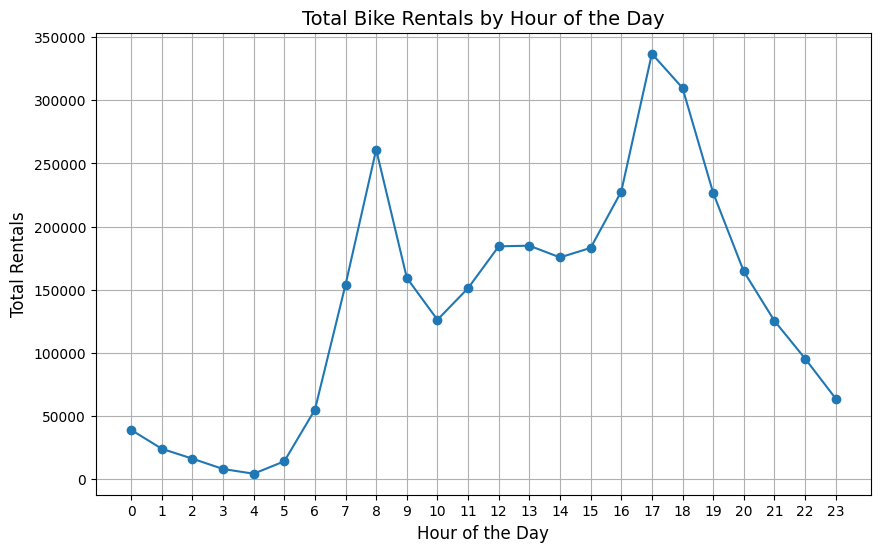

In [55]:
plt.figure(figsize=(10,6))
plt.plot(hourly_rentals['hr'], hourly_rentals['cnt'], marker='o')
plt.title('Total Bike Rentals by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(True)
plt.xticks(hourly_rentals['hr'])
plt.show()

**Insight:**
- Morning peak: 08.00
- Evening peak: 17.00

### Pertanyaan 2:

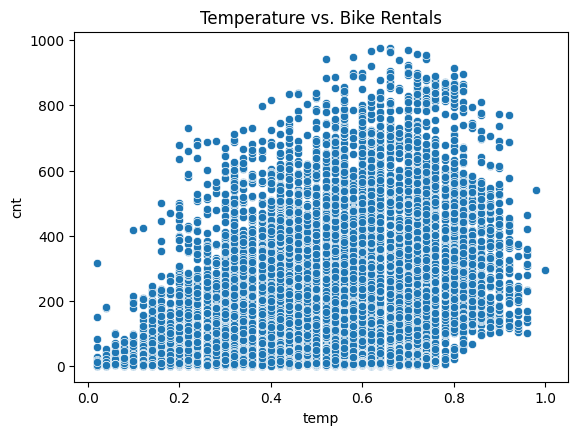

In [56]:
plt.figure(figsize=(14, 10))

# Temperature vs. Rentals
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Temperature vs. Bike Rentals')

plt.show()

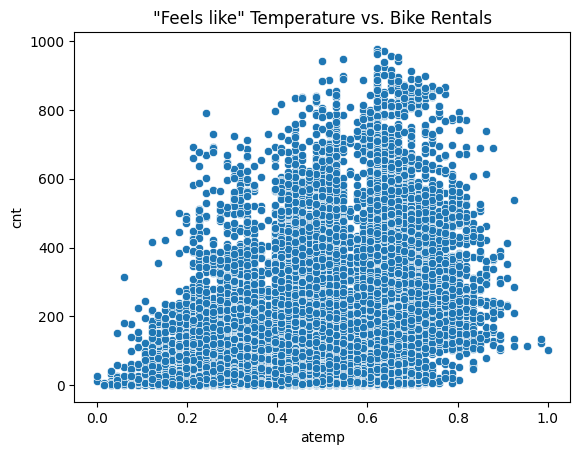

In [57]:
# "Feels like" Temperature vs. Rentals
plt.subplot(1, 1, 1)
sns.scatterplot(x='atemp', y='cnt', data=hour_df)
plt.title('"Feels like" Temperature vs. Bike Rentals')

plt.show()

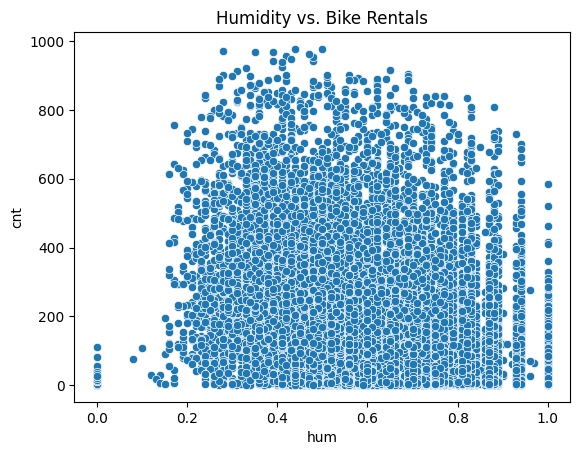

In [58]:
# Humidity vs. Rentals
plt.subplot(1, 1, 1)
sns.scatterplot(x='hum', y='cnt', data=hour_df)
plt.title('Humidity vs. Bike Rentals')

plt.show()

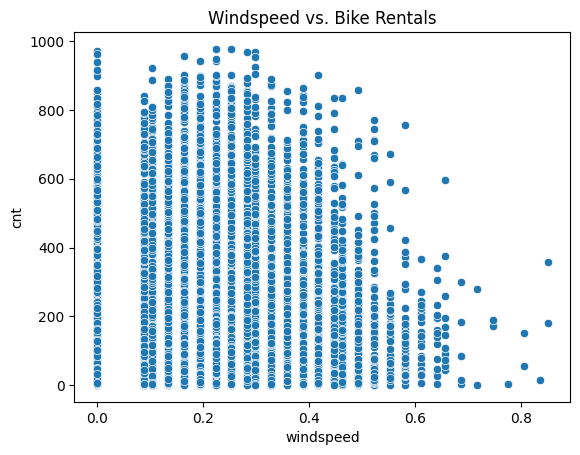

In [59]:
# Windspeed vs. Rentals
plt.subplot(1, 1, 1)
sns.scatterplot(x='windspeed', y='cnt', data=hour_df)
plt.title('Windspeed vs. Bike Rentals')

plt.show()

**Insight:**
- Temperature dan "Feels like" Temperature terlihat berpengaruh positif terhadap total penyewa sepeda
- Humidity tidak memiliki relasi yang jelas dengan total penyewa sepeda
- Windspeed berpengaruh negatif terhadap total penyewa sepeda

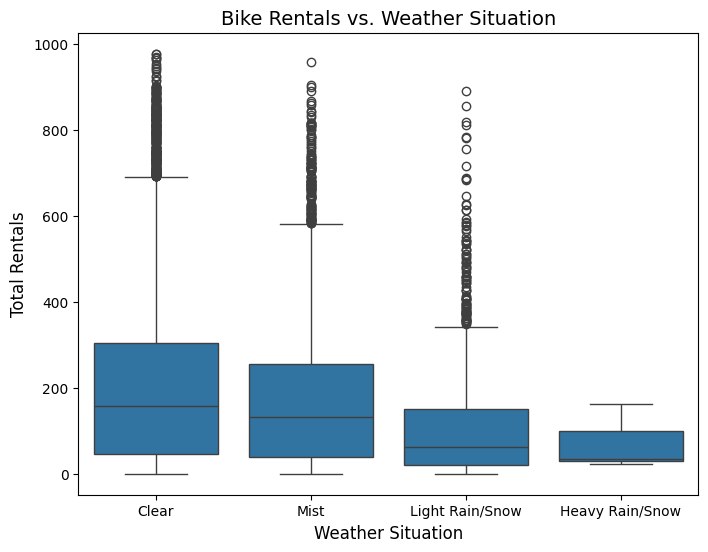

In [60]:
# Weather situation Vs Rentals

plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Bike Rentals vs. Weather Situation', fontsize=14)
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

**Insight:**
- Clear weather punya median dan range keseluruhan tertinggi

## Conclusion

- Sepeda paling banyak disewa pada jam 8 pagi dan 5 sore
- Keadaan cuaca memiliki pengaruh terhadap total penyewa. Semakin dingin temperatur dan cuaca hujan sangat mengurangi jumlah penyewa sepeda